# Gaussian white noise modeling 

In [1]:
import numpy as np

# Define parameters
n = 10000      # Number of samples (number of realizations)
dN = 1e-5      # Small time step (or other relevant parameter)
H = np.ones(n) # Hubble parameter array (can be more specific if needed)
num_realizations = 1000  # Number of realizations to average over

# Initialize the sum for the noise
noise_sum = 0

# Loop over multiple realizations
for _ in range(num_realizations):
    # Generate random noise terms
    F = np.random.randn(n) / np.sqrt(dN)    # Normal distribution, scaled by sqrt(dN)
    S = np.random.choice(np.array([-1, 1]), n)   # Random signs from {-1, 1}

    # Compute the noise term
    noise = (dN * F - S * np.sqrt(dN)) * (H / (2 * np.pi))
    
    # Sum the noise values for averaging
    noise_sum += np.mean(noise)

# Calculate the average noise over all realizations
average_noise = noise_sum / num_realizations

# Print the result
print("Average noise value:", average_noise)


Average noise value: -1.621968603495047e-07


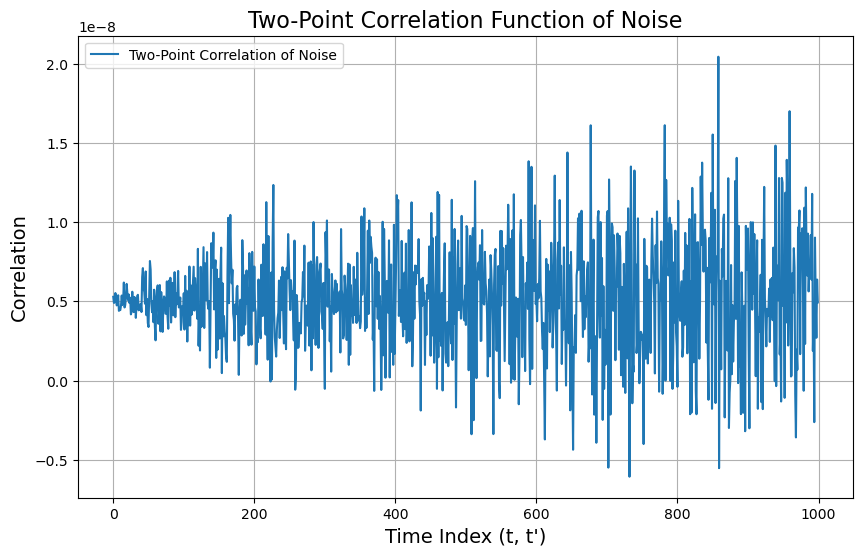

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n = 1000  # Number of samples (or points in time)
dN = 1e-4  # Small time step (or other relevant parameter)
H = np.ones(n)  # Hubble parameter array (can be more specific if needed)
num_realizations = 1000  # Number of realizations to average over

# Initialize arrays to store the noise and its correlation
noise_all_realizations = np.zeros((num_realizations, n))

# Generate noise for multiple realizations
for i in range(num_realizations):
    F = np.random.randn(n) / np.sqrt(dN)  # Normal distribution, scaled by sqrt(dN)
    S = np.random.choice(np.array([-1, 1]), n)  # Random signs from {-1, 1}
    
    # Compute the noise term
    noise = (dN * F - S * np.sqrt(dN)) * (H / (2 * np.pi))
    
    # Store the noise in the array for later analysis
    noise_all_realizations[i] = noise

# Calculate the two-point correlation function for each pair (t, t')
# We will compute the correlation between noise at different time indices (i, j)
correlation = np.zeros(n)

# Loop over all pairs of time indices (i, j) to calculate the two-point correlation
for i in range(n):
    for j in range(i, n):
        correlation[j] += np.mean(noise_all_realizations[:, i] * noise_all_realizations[:, j])

# Normalize the correlation function by the number of realizations
correlation /= num_realizations

# Plot the two-point correlation function
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n), correlation, label="Two-Point Correlation of Noise")
plt.xlabel("Time Index (t, t')", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.title("Two-Point Correlation Function of Noise", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()


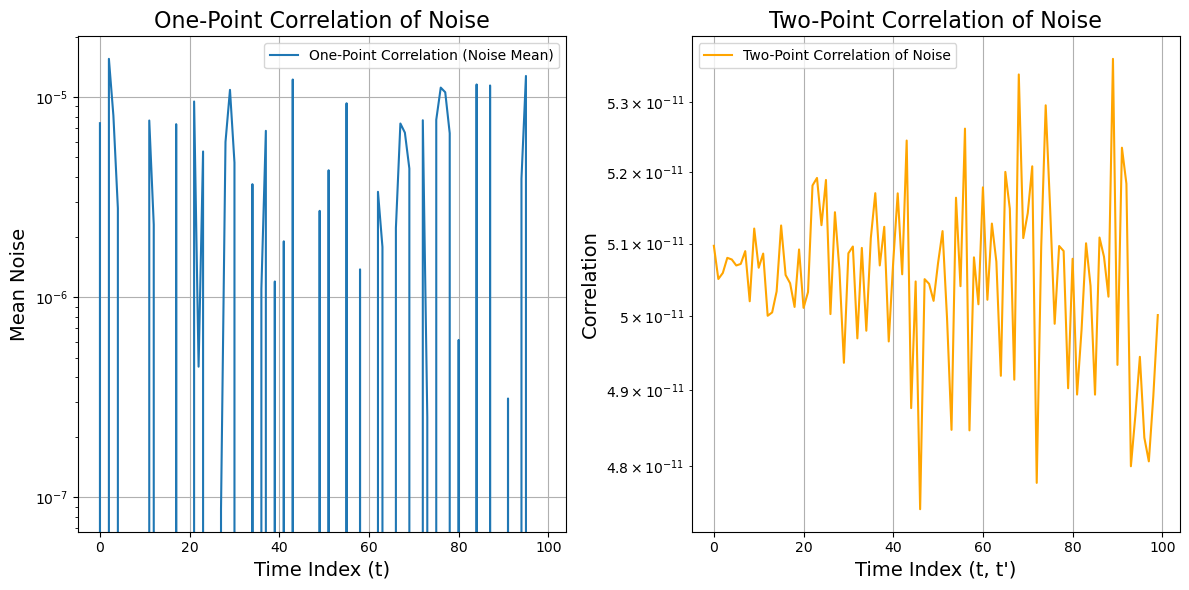

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n = 100  # Number of points (or samples)
dN = 1e-4  # Small time step (or other relevant parameter)
num_realizations = 100000  # Number of realizations to average over

# Define the quadratic function H(t)
def H(t):
    a = 0.0  # Coefficient for t^2
    b = 0.0  # Coefficient for t
    c = 1.0  # Constant term
    return a * t**2 + b * t + c

# Generate time values (t) for the noise
t_values = np.linspace(0, 10, n)

# Initialize arrays to store the noise and its correlation
noise_all_realizations = np.zeros((num_realizations, n))

# Generate noise for multiple realizations
for i in range(num_realizations):
    # Generate F (random normal noise) and S (random signs)
    F = np.random.randn(n) / np.sqrt(dN)  # Normal distribution, scaled by sqrt(dN)
    S = np.random.choice(np.array([-1, 1]), n)  # Random signs from {-1, 1}
    
    # Compute the noise term using the quadratic H(t)
    noise = (dN * F - S * np.sqrt(dN)) *(H(t_values) / (2 * np.pi))
    
    # Store the noise in the array for later analysis
    noise_all_realizations[i] = noise

# --- One-Point Correlation (Mean of Noise) ---
one_point_correlation = np.mean(noise_all_realizations, axis=0)

# --- Two-Point Correlation ---
correlation = np.zeros(n)

# Loop over all pairs of time indices (i, j) to calculate the two-point correlation
for i in range(n):
    for j in range(i, n):
        correlation[j] += np.mean(noise_all_realizations[:, i] * noise_all_realizations[:, j])

# Normalize the correlation function by the number of realizations
correlation /= num_realizations

# --- Plotting ---
plt.figure(figsize=(12, 6))

# Plot One-Point Correlation (Mean of Noise)
plt.subplot(1, 2, 1)
plt.plot(np.arange(n), one_point_correlation, label="One-Point Correlation (Noise Mean)")
#plt.plot(np.arange(n), H(np.arange(n)) / (2 * np.pi))
plt.xlabel("Time Index (t)", fontsize=14)
plt.ylabel("Mean Noise", fontsize=14)
plt.yscale('log')
plt.title("One-Point Correlation of Noise", fontsize=16)
plt.grid(True)
plt.legend()

# Plot Two-Point Correlation (Noise Correlation)
plt.subplot(1, 2, 2)
plt.plot(np.arange(n), correlation, label="Two-Point Correlation of Noise", color='orange')
#plt.plot(np.arange(n), H(np.arange(n)) / (2 * np.pi) )
plt.xlabel("Time Index (t, t')", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.yscale('log')
plt.title("Two-Point Correlation of Noise", fontsize=16)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


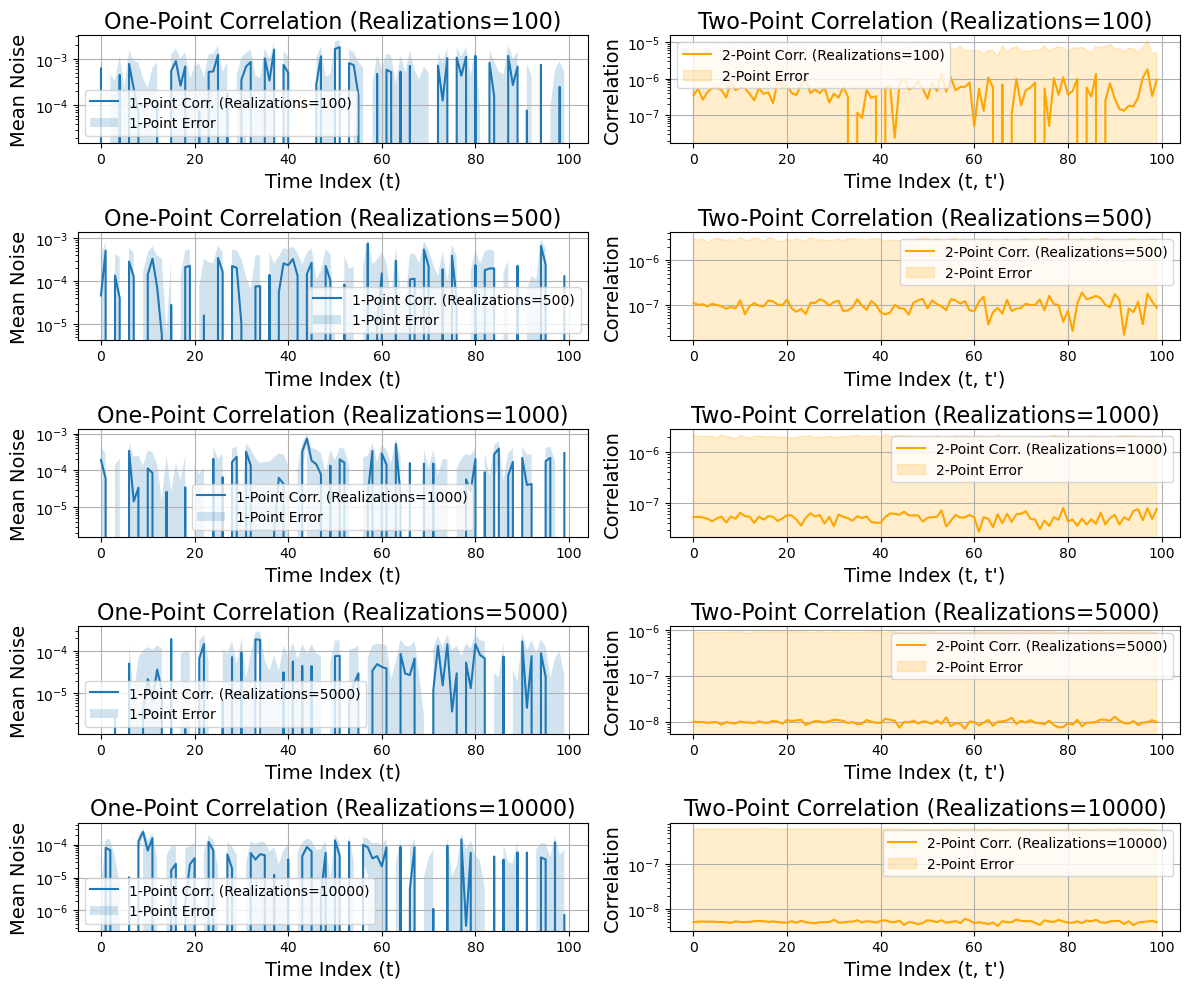

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n = 100  # Number of points (or samples)
dN = 1e-3  # Small time step (or other relevant parameter)
realization_list = [100, 500, 1000, 5000, 10000]  # Different numbers of realizations to test

# Define the quadratic function H(t) - here H(t) = 1
def H(t):
    return 1  # Constant function as specified (H(t) = 1)

# Generate time values (t) for the noise
t_values = np.linspace(0, 10, n)

# Plotting
plt.figure(figsize=(12, 10))

# Loop through different numbers of realizations and compute correlations
for realizations in realization_list:
    # Initialize arrays to store the noise and its correlation
    noise_all_realizations = np.zeros((realizations, n))

    # Generate noise for multiple realizations
    for i in range(realizations):
        # Generate F (random normal noise) and S (random signs)
        F = np.random.randn(n) / np.sqrt(dN)  # Normal distribution, scaled by sqrt(dN)
        S = np.random.choice(np.array([-1, 1]), n)  # Random signs from {-1, 1}

        # Compute the noise term using the quadratic H(t) (which is 1 here)
        noise = (dN * F - S * np.sqrt(dN)) * (H(t_values) / (2 * np.pi))

        # Store the noise in the array for later analysis
        noise_all_realizations[i] = noise

    # --- One-Point Correlation (Mean of Noise) ---
    one_point_correlation = np.mean(noise_all_realizations, axis=0)

    # --- Standard Deviation (Error) for One-Point Correlation ---
    one_point_error = np.std(noise_all_realizations, axis=0) / np.sqrt(realizations)

    # --- Two-Point Correlation ---
    correlation = np.zeros(n)

    # Loop over all pairs of time indices (i, j) to calculate the two-point correlation
    for i in range(n):
        for j in range(i, n):
            correlation[j] += np.mean(noise_all_realizations[:, i] * noise_all_realizations[:, j])

    # Normalize the correlation function by the number of realizations
    correlation /= realizations

    # --- Standard Deviation (Error) for Two-Point Correlation ---
    two_point_error = np.zeros(n)
    for i in range(n):
        for j in range(i, n):
            two_point_error[j] = np.std(noise_all_realizations[:, i] * noise_all_realizations[:, j]) / np.sqrt(realizations)

    # --- Plotting ---
    plt.subplot(len(realization_list), 2, 2 * realization_list.index(realizations) + 1)
    plt.plot(np.arange(n), one_point_correlation, label=f"1-Point Corr. (Realizations={realizations})")
    plt.fill_between(np.arange(n), one_point_correlation - one_point_error, one_point_correlation + one_point_error, alpha=0.2, label="1-Point Error")
    plt.xlabel("Time Index (t)", fontsize=14)
    plt.ylabel("Mean Noise", fontsize=14)
    plt.yscale('log')
    plt.title(f"One-Point Correlation (Realizations={realizations})", fontsize=16)
    plt.grid(True)
    plt.legend()

    plt.subplot(len(realization_list), 2, 2 * realization_list.index(realizations) + 2)
    plt.plot(np.arange(n), correlation, label=f"2-Point Corr. (Realizations={realizations})", color='orange')
    plt.fill_between(np.arange(n), correlation - two_point_error, correlation + two_point_error, alpha=0.2, color='orange', label="2-Point Error")
    plt.xlabel("Time Index (t, t')", fontsize=14)
    plt.ylabel("Correlation", fontsize=14)
    plt.yscale('log')
    plt.title(f"Two-Point Correlation (Realizations={realizations})", fontsize=16)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


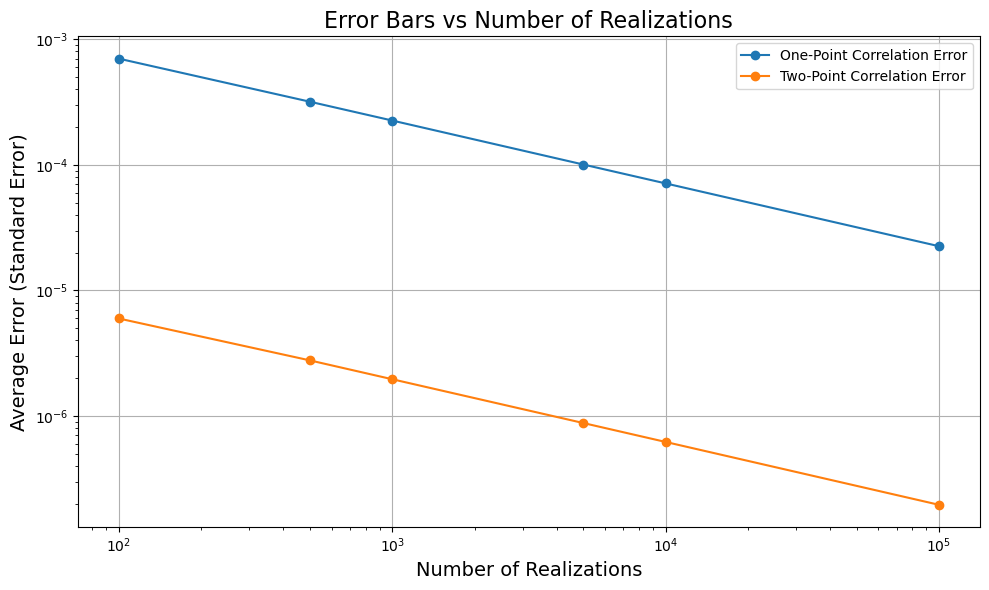

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n = 100  # Number of points (or samples)
dN = 1e-3  # Small time step (or other relevant parameter)
realization_list = [100, 500, 1000, 5000, 10000, 100000]  # Different numbers of realizations to test

# Define the quadratic function H(t) - here H(t) = 1
def H(t):
    return 1  # Constant function as specified (H(t) = 1)

# Generate time values (t) for the noise
t_values = np.linspace(0, 10, n)

# Lists to store errors for plotting
one_point_errors = []
two_point_errors = []

# Loop through different numbers of realizations and compute correlations
for realizations in realization_list:
    # Initialize arrays to store the noise and its correlation
    noise_all_realizations = np.zeros((realizations, n))

    # Generate noise for multiple realizations
    for i in range(realizations):
        # Generate F (random normal noise) and S (random signs)
        F = np.random.randn(n) / np.sqrt(dN)  # Normal distribution, scaled by sqrt(dN)
        S = np.random.choice(np.array([-1, 1]), n)  # Random signs from {-1, 1}

        # Compute the noise term using the quadratic H(t) (which is 1 here)
        noise = (dN * F - S * np.sqrt(dN)) * (H(t_values) / (2 * np.pi))

        # Store the noise in the array for later analysis
        noise_all_realizations[i] = noise

    # --- One-Point Correlation (Mean of Noise) ---
    one_point_correlation = np.mean(noise_all_realizations, axis=0)

    # --- Standard Deviation (Error) for One-Point Correlation ---
    one_point_error = np.std(noise_all_realizations, axis=0) / np.sqrt(realizations)
    one_point_errors.append(np.mean(one_point_error))  # Average error for one-point correlation

    # --- Two-Point Correlation ---
    correlation = np.zeros(n)

    # Loop over all pairs of time indices (i, j) to calculate the two-point correlation
    for i in range(n):
        for j in range(i, n):
            correlation[j] += np.mean(noise_all_realizations[:, i] * noise_all_realizations[:, j])

    # Normalize the correlation function by the number of realizations
    correlation /= realizations

    # --- Standard Deviation (Error) for Two-Point Correlation ---
    two_point_error = np.zeros(n)
    for i in range(n):
        for j in range(i, n):
            two_point_error[j] = np.std(noise_all_realizations[:, i] * noise_all_realizations[:, j]) / np.sqrt(realizations)
    
    two_point_errors.append(np.mean(two_point_error))  # Average error for two-point correlation

# Plot error bars vs number of realizations
plt.figure(figsize=(10, 6))

plt.plot(realization_list, one_point_errors, label='One-Point Correlation Error', marker='o')
plt.plot(realization_list, two_point_errors, label='Two-Point Correlation Error', marker='o')
plt.xlabel('Number of Realizations', fontsize=14)
plt.ylabel('Average Error (Standard Error)', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.title('Error Bars vs Number of Realizations', fontsize=16)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


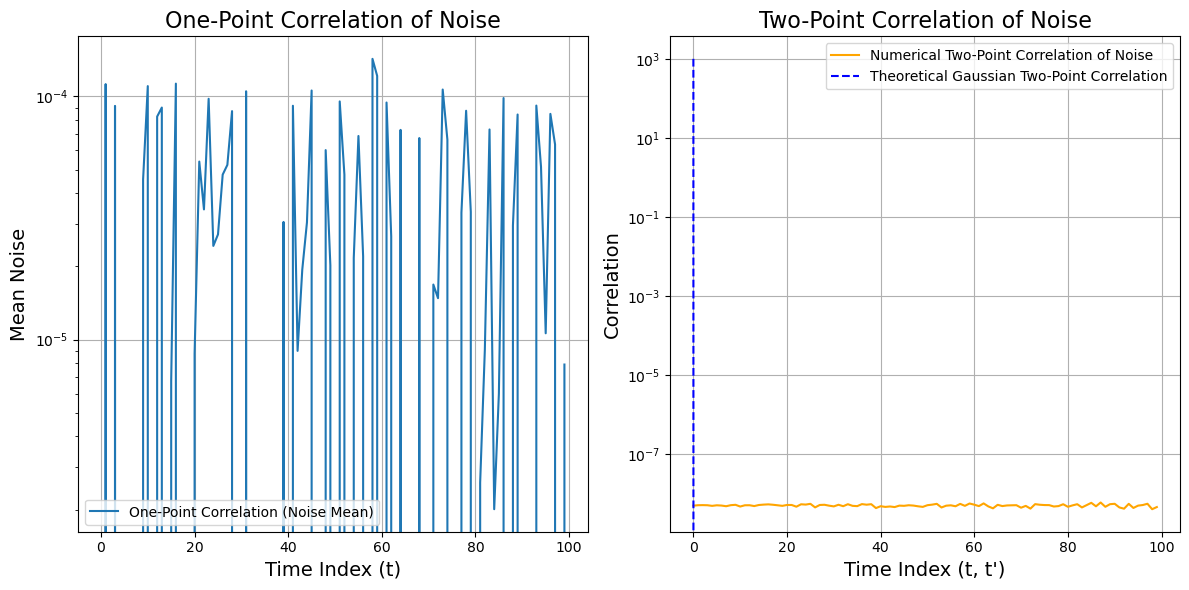

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n = 100  # Number of points (or samples)
dN = 1e-3  # Small time step (or other relevant parameter)
num_realizations = 10000  # Number of realizations to average over

# Define the quadratic function H(t)
def H(t):
    return 1  # Constant function as specified (H(t) = 1)

# Generate time values (t) for the noise
t_values = np.linspace(0, 10, n)

# Initialize arrays to store the noise and its correlation
noise_all_realizations = np.zeros((num_realizations, n))

# Generate noise for multiple realizations
for i in range(num_realizations):
    # Generate F (random normal noise) and S (random signs)
    F = np.random.randn(n) / np.sqrt(dN)  # Normal distribution, scaled by sqrt(dN)
    S = np.random.choice(np.array([-1, 1]), n)  # Random signs from {-1, 1}
    
    # Compute the noise term using the quadratic H(t) (which is 1 here)
    noise = (dN * F - S * np.sqrt(dN)) * (H(t_values) / (2 * np.pi))
    
    # Store the noise in the array for later analysis
    noise_all_realizations[i] = noise

# --- One-Point Correlation (Mean of Noise) ---
one_point_correlation = np.mean(noise_all_realizations, axis=0)

# --- Two-Point Correlation ---
correlation = np.zeros(n)

# Loop over all pairs of time indices (i, j) to calculate the two-point correlation
for i in range(n):
    for j in range(i, n):
        correlation[j] += np.mean(noise_all_realizations[:, i] * noise_all_realizations[:, j])

# Normalize the correlation function by the number of realizations
correlation /= num_realizations

# --- Theoretical Gaussian Correlation ---
# Assuming unit variance for the noise
sigma = 1  # Standard deviation of the noise
theoretical_correlation = np.zeros(n)

# Theoretical correlation is proportional to 1/dN at t = t'
theoretical_correlation[0] = sigma**2 / dN  # Peak at t = t' (normalized)

# --- Plotting --- 
plt.figure(figsize=(12, 6))

# Plot One-Point Correlation (Mean of Noise)
plt.subplot(1, 2, 1)
plt.plot(np.arange(n), one_point_correlation, label="One-Point Correlation (Noise Mean)")
plt.xlabel("Time Index (t)", fontsize=14)
plt.ylabel("Mean Noise", fontsize=14)
plt.yscale('log')
plt.title("One-Point Correlation of Noise", fontsize=16)
plt.grid(True)
plt.legend()

# Plot Two-Point Correlation (Noise Correlation) and Theoretical Gaussian Correlation
plt.subplot(1, 2, 2)
plt.plot(np.arange(n), correlation, label="Numerical Two-Point Correlation of Noise", color='orange')
plt.plot(np.arange(n), theoretical_correlation, label="Theoretical Gaussian Two-Point Correlation", color='blue', linestyle='--')
plt.xlabel("Time Index (t, t')", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.yscale('log')
plt.title("Two-Point Correlation of Noise", fontsize=16)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


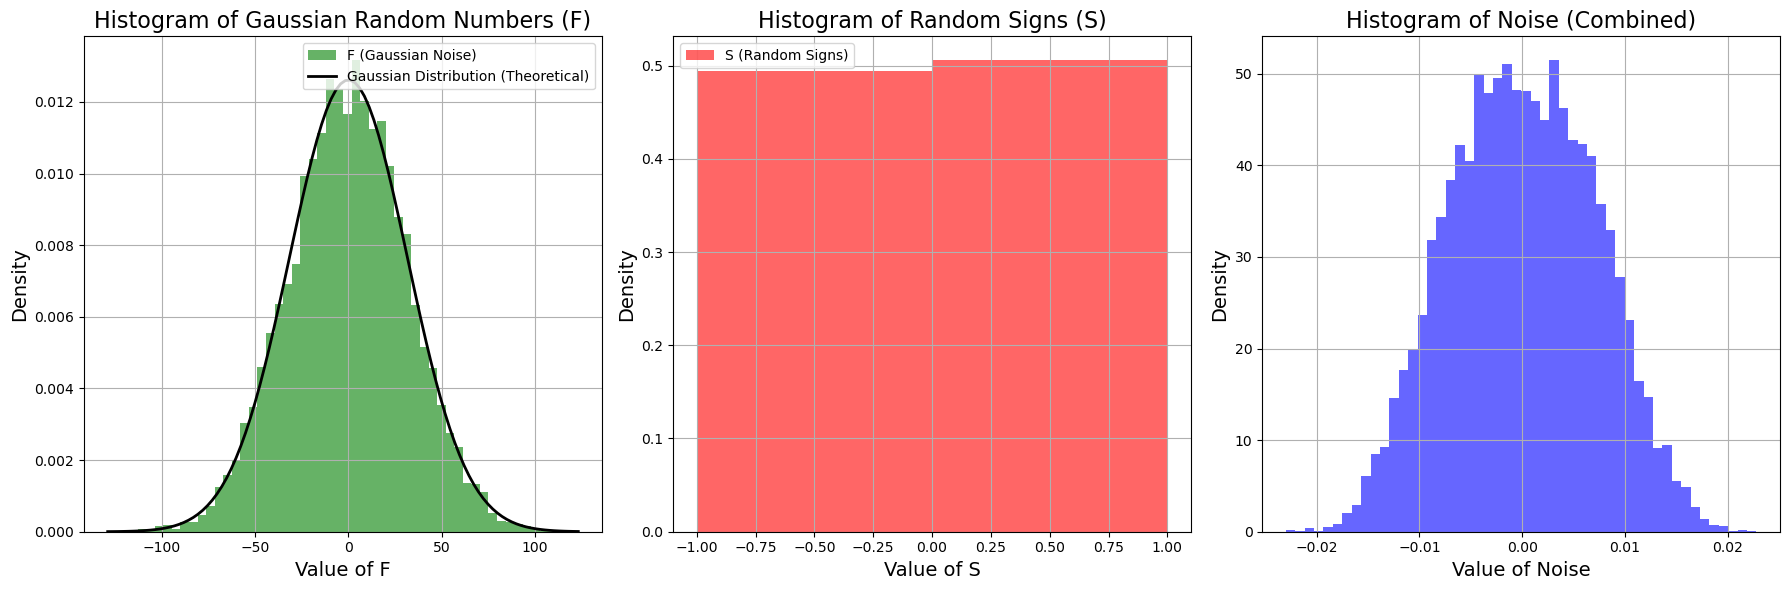

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
n = 100  # Number of points (or samples)
dN = 1e-3  # Small time step (or other relevant parameter)
num_realizations = 100  # Number of realizations to average over

# Define the quadratic function H(t)
def H(t):
    a = 0.0  # Coefficient for t^2
    b = 0.0  # Coefficient for t
    c = 1.0  # Constant term
    return a * t**2 + b * t + c

# Generate time values (t) for the noise
t_values = np.linspace(0, 10, n)

# Initialize arrays to store the noise and its correlation
noise_all_realizations = np.zeros((num_realizations, n))

# Arrays to store individual random noise components (F and S)
F_all = []
S_all = []

# Generate noise for multiple realizations
for i in range(num_realizations):
    # Generate F (random normal noise) and S (random signs)
    F = np.random.randn(n) / np.sqrt(dN)  # Normal distribution, scaled by sqrt(dN)
    S = np.random.choice(np.array([-1, 1]), n)  # Random signs from {-1, 1}
    
    # Store F and S for later plotting
    F_all.extend(F)  # Collect F values across all realizations
    S_all.extend(S)  # Collect S values across all realizations
    
    # Compute the noise term using the quadratic H(t)
    noise = (dN * F + S * np.sqrt(dN)) * (H(t_values) / (2 * np.pi))
    
    # Store the noise in the array for later analysis
    noise_all_realizations[i] = noise

# Plotting histograms of the noise components and the final noise

plt.figure(figsize=(18, 6))

# Histogram for F (Gaussian random noise)
plt.subplot(1, 3, 1)
plt.hist(F_all, bins=50, density=True, alpha=0.6, color='g', label='F (Gaussian Noise)')

# Overlay the Gaussian distribution (theoretical)
xmin, xmax = plt.xlim()  # Get the limits of the histogram
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1 / np.sqrt(dN))   # PDF of standard normal distribution (mean=0, std=1)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Distribution (Theoretical)')

plt.xlabel('Value of F', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Histogram of Gaussian Random Numbers (F)', fontsize=16)
plt.grid(True)
plt.legend()

# Histogram for S (Random signs)
plt.subplot(1, 3, 2)
plt.hist(S_all, bins=2, density=True, alpha=0.6, color='r', label='S (Random Signs)')
plt.xlabel('Value of S', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Histogram of Random Signs (S)', fontsize=16)
plt.grid(True)
plt.legend()

# Histogram for Noise (combined)
plt.subplot(1, 3, 3)
# Flatten all noise realizations into a single list to plot the histogram
noise_all_realizations_flat = noise_all_realizations.flatten()
plt.hist(noise_all_realizations_flat, bins=50, density=True, alpha=0.6, color='b', label='Noise (Final)')
plt.xlabel('Value of Noise', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Histogram of Noise (Combined)', fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()


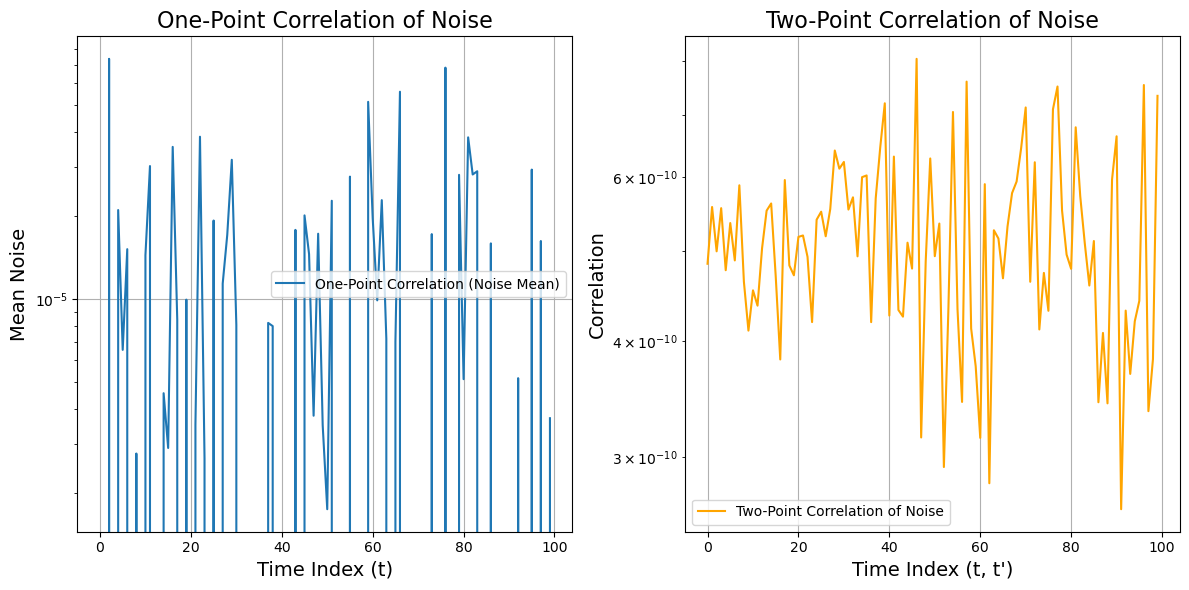

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n = 100  # Number of samples (or points in time)
dN = 1e-5  # Small time step (or other relevant parameter)
# Define the coefficients for the quadratic polynomial
a = 1.0  # Coefficient for t^2
b = -2.0  # Coefficient for t
c = 3.0  # Constant term

# Define the function H as a quadratic polynomial
def H(t):
    return a * t**2 + b * t + c # Hubble parameter array (can be more specific if needed)
num_realizations = 1000  # Number of realizations to average over

# Initialize arrays to store the noise and its correlation
noise_all_realizations = np.zeros((num_realizations, n))

# Generate noise for multiple realizations
for i in range(num_realizations):
    F = np.random.randn(n) / np.sqrt(dN)  # Normal distribution, scaled by sqrt(dN)
    S = np.random.choice(np.array([-1, 1]), n)  # Random signs from {-1, 1}
    
    # Compute the noise term
    noise = (dN * F - S * np.sqrt(dN)) * (1 / (2 * np.pi))
    
    # Store the noise in the array for later analysis
    noise_all_realizations[i] = noise

# --- One-Point Correlation (Average of Noise) ---
one_point_correlation = np.mean(noise_all_realizations, axis=0)

# --- Two-Point Correlation ---
correlation = np.zeros(n)

# Loop over all pairs of time indices (i, j) to calculate the two-point correlation
for i in range(n):
    for j in range(i, n):
        correlation[j] += np.mean(noise_all_realizations[:, i] * noise_all_realizations[:, j])

# Normalize the correlation function by the number of realizations
correlation /= num_realizations

# --- Plotting ---
plt.figure(figsize=(12, 6))

# Plot One-Point Correlation (Mean of Noise)
plt.subplot(1, 2, 1)
plt.plot(np.arange(n), one_point_correlation, label="One-Point Correlation (Noise Mean)")
plt.xlabel("Time Index (t)", fontsize=14)
plt.ylabel("Mean Noise", fontsize=14)
plt.yscale('log')
plt.title("One-Point Correlation of Noise", fontsize=16)
plt.grid(True)
plt.legend()

# Plot Two-Point Correlation (Noise Correlation)
plt.subplot(1, 2, 2)
plt.plot(np.arange(n), correlation, label="Two-Point Correlation of Noise", color='orange')
plt.xlabel("Time Index (t, t')", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.yscale('log')
plt.title("Two-Point Correlation of Noise", fontsize=16)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
